           date  price_bitcoin  price_ethereum  price_ripple  price_litecoin  \
0    2015-08-07     278.508814        2.831620      0.008138        4.184886   
1    2015-08-08     259.800728        1.330750      0.008449        3.914908   
2    2015-08-10     263.578200        0.687586      0.008744        3.935052   
3    2015-08-11     269.866800        1.067379      0.008637        4.123325   
4    2015-08-12     267.712600        1.256613      0.008326        4.059464   
...         ...            ...             ...           ...             ...   
3146 2024-03-23   63509.044965     3322.891277      0.610573       83.162378   
3147 2024-03-24   64285.802791     3353.371242      0.618121       85.627293   
3148 2024-03-25   67310.983268     3454.257071      0.633712       89.786931   
3149 2024-03-26   69938.945302     3588.493402      0.640038       90.228322   
3150 2024-03-27   70082.051225     3591.548528      0.632866       95.787527   

      Diferencia_Precio  
0            

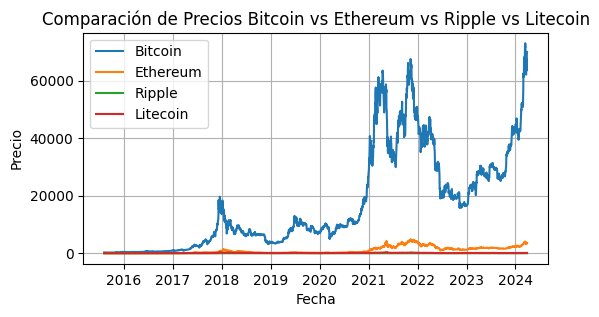

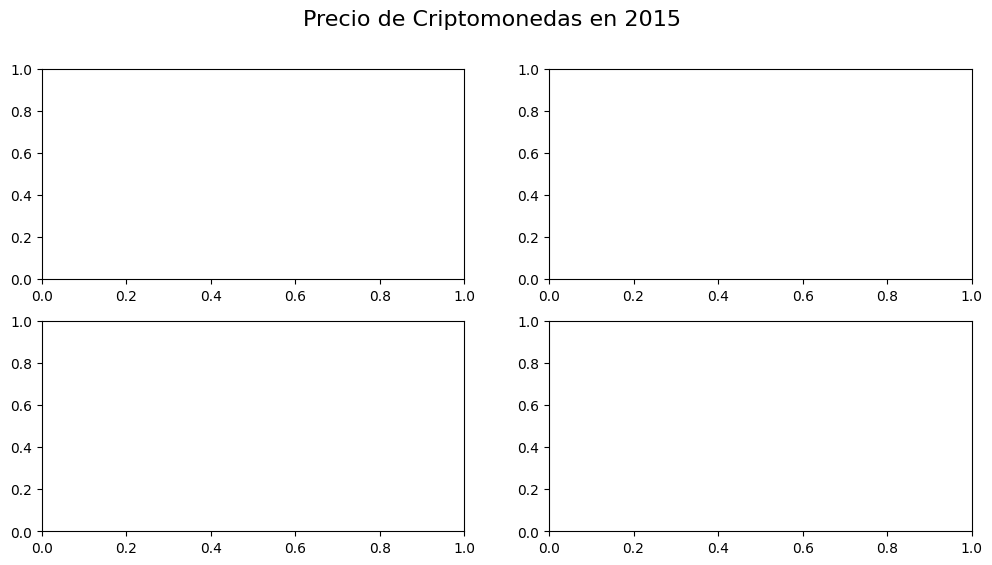

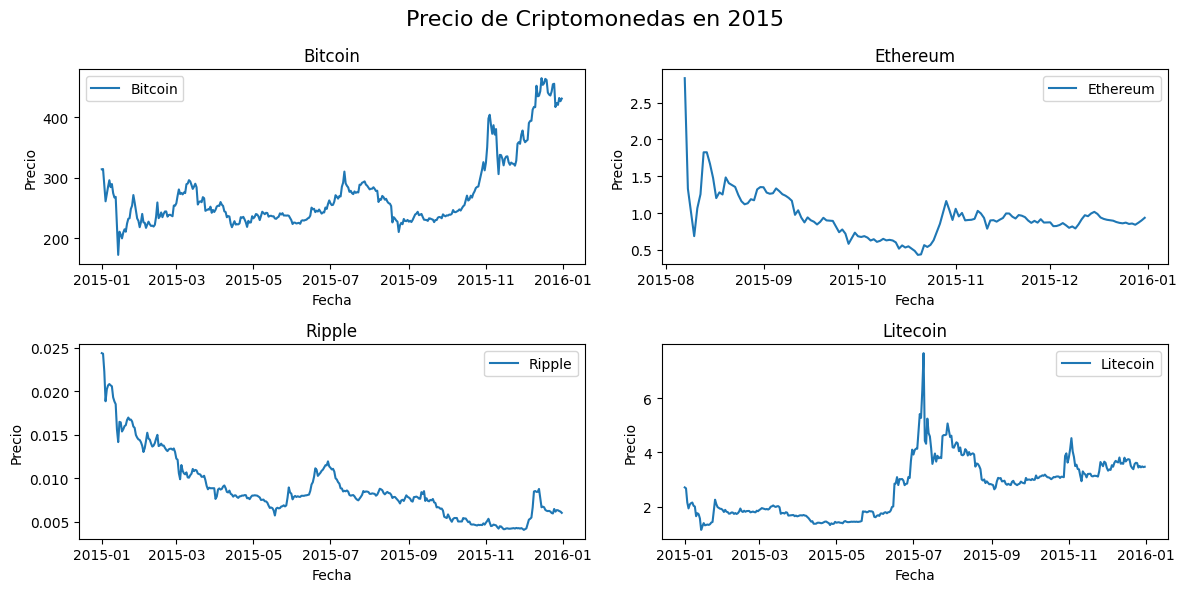

<Figure size 640x480 with 0 Axes>

           date  market_cap_bitcoin  market_cap_ethereum  market_cap_ripple  \
0    2015-08-07        4.015651e+09         0.000000e+00       2.596767e+08   
1    2015-08-08        3.745911e+09         8.033948e+07       2.695966e+08   
2    2015-08-10        3.817350e+09         4.155631e+07       2.790050e+08   
3    2015-08-11        3.909601e+09         6.453901e+07       2.755990e+08   
4    2015-08-12        3.879202e+09         7.601326e+07       2.656680e+08   
...         ...                 ...                  ...                ...   
3146 2024-03-23        1.247366e+12         3.980049e+11       3.349665e+10   
3147 2024-03-24        1.264722e+12         4.027873e+11       3.395527e+10   
3148 2024-03-25        1.323456e+12         4.152273e+11       3.480976e+10   
3149 2024-03-26        1.371797e+12         4.298344e+11       3.505784e+10   
3150 2024-03-27        1.375729e+12         4.306392e+11       3.467627e+10   

      market_cap_litecoin  
0            1.718568e+

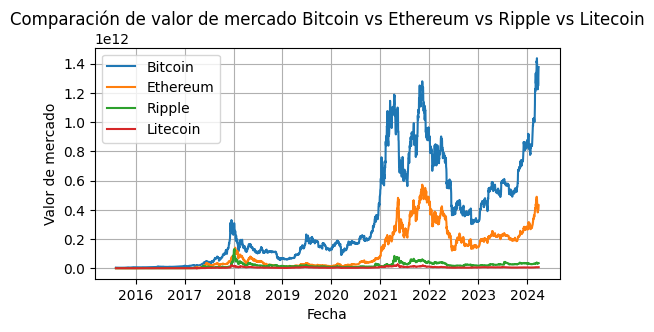

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

# Cargar los archivos CSV en DataFrames
bitcoin_df = pd.read_csv('files/bitcoin.csv')
ethereum_df = pd.read_csv('files/ethereum.csv')
ripple_df = pd.read_csv('files/ripple.csv')
litecoin_df = pd.read_csv('files/litecoin.csv')

# Asegurarse de que las columnas de fecha tengan el mismo formato
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'])
ethereum_df['date'] = pd.to_datetime(ethereum_df['date'])
ripple_df ['date'] = pd.to_datetime(ripple_df['date'])
litecoin_df ['date'] = pd.to_datetime(litecoin_df['date'])


# Fusionar los DataFrames por la fecha
merged_df = pd.merge(bitcoin_df, ethereum_df, on='date', how='inner', suffixes=('_bitcoin', '_ethereum'))

merged_df = pd.merge(merged_df, ripple_df, on='date', how='inner', suffixes=('', '_ripple'))

merged_df = pd.merge(merged_df, litecoin_df, on='date', how='inner', suffixes=('_ripple', '_litecoin'))



# Comparar el precio
merged_df['Diferencia_Precio'] = merged_df['price_bitcoin'] - merged_df['price_ethereum'] - merged_df['price_ripple'] - merged_df['price_litecoin']

# Mostrar el DataFrame con la comparación
print(merged_df[['date', 'price_bitcoin', 'price_ethereum', 'price_ripple', 'price_litecoin',  'Diferencia_Precio']])

# Graficar los precios
plt.figure(figsize=(6, 3))
plt.plot(merged_df['date'], merged_df['price_bitcoin'], label='Bitcoin')
plt.plot(merged_df['date'], merged_df['price_ethereum'], label='Ethereum')
plt.plot(merged_df['date'], merged_df['price_ripple'], label = 'Ripple')
plt.plot(merged_df['date'], merged_df['price_litecoin'], label = 'Litecoin')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Comparación de Precios Bitcoin vs Ethereum vs Ripple vs Litecoin')
plt.legend()
plt.grid(True)
plt.show()


# Filtrar los datos para el año 2015
bitcoin_2015 = bitcoin_df[(bitcoin_df['date'] >= '2015-01-01') & (bitcoin_df['date'] <= '2015-12-31')]
ethereum_2015 = ethereum_df[(ethereum_df['date'] >= '2015-01-01') & (ethereum_df['date'] <= '2015-12-31')]
ripple_2015 = ripple_df[(ripple_df['date'] >= '2015-01-01') & (ripple_df['date'] <= '2015-12-31')]
litecoin_2015 = litecoin_df[(litecoin_df['date'] >= '2015-01-01') & (litecoin_df['date'] <= '2015-12-31')]



# Crear la figura y los subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('Precio de Criptomonedas en 2015', fontsize=16)

# Graficar Bitcoin
axs[0, 0].plot(bitcoin_2015['date'], bitcoin_2015['price'], label='Bitcoin')
axs[0, 0].set_title('Bitcoin')
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Precio')
axs[0, 0].legend()

# Graficar Ethereum
axs[0, 1].plot(ethereum_2015['date'], ethereum_2015['price'], label='Ethereum')
axs[0, 1].set_title('Ethereum')
axs[0, 1].set_xlabel('Fecha')
axs[0, 1].set_ylabel('Precio')
axs[0, 1].legend()

# Graficar Ripple
axs[1, 0].plot(ripple_2015['date'], ripple_2015['price'], label='Ripple')
axs[1, 0].set_title('Ripple')
axs[1, 0].set_xlabel('Fecha')
axs[1, 0].set_ylabel('Precio')
axs[1, 0].legend()

# Graficar Litecoin
axs[1, 1].plot(litecoin_2015['date'], litecoin_2015['price'], label='Litecoin')
axs[1, 1].set_title('Litecoin')
axs[1, 1].set_xlabel('Fecha')
axs[1, 1].set_ylabel('Precio')
axs[1, 1].legend()

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

#comparando market cap
merged_df['market_cap'] = merged_df['market_cap_bitcoin'] - merged_df['market_cap_ethereum'] - merged_df['market_cap_ripple'] - merged_df['market_cap_litecoin']

print(merged_df[['date', 'market_cap_bitcoin', 'market_cap_ethereum', 'market_cap_ripple', 'market_cap_litecoin' ]])
plt.figure(figsize=(6,3))
plt.plot(merged_df['date'], merged_df['market_cap_bitcoin'], label= 'Bitcoin')
plt.plot(merged_df['date'], merged_df['market_cap_ethereum'], label= 'Ethereum')
plt.plot(merged_df['date'], merged_df['market_cap_ripple'], label= 'Ripple')
plt.plot(merged_df['date'], merged_df['market_cap_litecoin'], label ='Litecoin')
plt.xlabel('Fecha')
plt.ylabel('Valor de mercado')
plt.title('Comparación de valor de mercado Bitcoin vs Ethereum vs Ripple vs Litecoin')
plt.legend()
plt.grid(True)
plt.show()
